# File Variables to Use #

In [1]:
!ls

DataExplorationCont.ipynb
DataInvestigation_Alex.ipynb
InitialDataExploration.ipynb
Movie-Data-Project1.ipynb
Neptune-Jennifer Cleaning.ipynb
Neptune-JenniferCleaningComplete.ipynb
README.md
imdb_title_basics.csv
zippedData


In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.5f}'.format
import re
import matplotlib.pyplot as plt
%matplotlib inline 
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz') # CLEANED except for year/title thing
imdb_name_basics_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_title_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz') # JENNIFER 
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_principals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz') #ALEX 
# rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
# rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding='latin1')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz') #CLEAN 
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') #PATRICK 

## Cleaning To Dos for Movie Gross ##
Get rid of rows with null values in the studio field and in the domestic gross field since there aren't many of them
ignore the foreign gross nulls, info may be listed on other sheets iirc. Alternately possibly could be calculated w/ info from other sheets
do a unique value check on year, make sure nothing weird
do a unique value check on studio, can we replace w/proper names?
sort by domestic gross and check the tail
clean out "(YEAR)" from movie titles (via regular expression?)

In [3]:
movie_gross_df.dropna(subset=['studio','domestic_gross'], inplace = True)


In [4]:
#importing regex so I can more easily find the films with the year added to their titles

import re

In [5]:

# df[df['Country (region)'].str.count('^[pP].*')>0]
#movie_gross_df[movie_gross_df['title'].str.count("/\(([^()\]*)\)/g'")>0]

## Cleaning To Dos for tmdb_movies_df ##
- add genre columns
- check min/maxs
- note no nulls
- clean out rows w/empty lists in genre category (like 10% of the data set, 2.6k, more then I like but average isn't going to cut it and there's no way to manually enter that many)

In [6]:
# Gets rid of row of empty lists in google

tmdb_movies_df.drop(tmdb_movies_df[tmdb_movies_df['genre_ids'] == '[]'].index, inplace = True)

In [7]:
## going to try and create a column for each genre based on the list and then populate it with boolean for the particular film
## start going to make a dictionary of the codes, then going to loop through, each loop creates a column and populates it

genre_dict = {28:'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80:'Crime', 99:'Documentary',18:'Drama', 10751:'Family',
              14:'Fantasy', 36: 'History', 27:'Horror', 10402:'Music', 9648:'Mystery', 10749:'Romance', 878:'Science Fiction',
              53:'Thriller', 10752:'War',37:'Western'}
#didn't include TV Movie category since we don't care about those (may want to filter them out...)

In [8]:
# clears out the tv movies 
tmdb_movies_df.drop(tmdb_movies_df.loc[tmdb_movies_df['genre_ids'].str.contains('10770')].index, inplace = True)

In [9]:
## creates new columns with True/False values

for key, value in genre_dict.items():
    tmdb_movies_df[value] = tmdb_movies_df['genre_ids'].str.contains(str(key))

## QUESTIONS FOR TEACHERS ##

- WHy is the GitHub notebook so different from the "live" version?
- How to get regular expression to work? 
- What kind of graph are good to show a category with multiple values aka genre - stacked bar chart?

## INVESTIGATION GOALS ##

- Alex: genre by profit or genre by likes, if possible some kind of stacked bar chart, What kinds of films are popular? 
- Patrick: production budget v profit - gross vs foreign, possibly incorporating genre, What films are the most profitable? 
- Jennifer: genre over **time** - aka What's being made? What studio is making what?

Checking out which columns have problamatic null values.

In [10]:
imdb_title_basics_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


We decided to keep the rows with null values in runtime_minutes just in case the column is useful later. I will replace the NaN with zeros. If need be we can change them later to something more relevant.

In [11]:
imdb_title_basics_df['runtime_minutes'].fillna(0, inplace = True)

In [12]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


I decided to drop the rows in genres with NaN because the amount of rows was a small percentage of the overall dataset. 

In [13]:
imdb_title_basics_df = imdb_title_basics_df.dropna(subset = ['genres'])

I will replace the null values in original_title to 0. There are so few I don't expect it to be an issues. We also may end up not needing this column.

In [14]:
imdb_title_basics_df['original_title'].fillna(0, inplace = True)

In [15]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140736 non-null  object 
 3   start_year       140736 non-null  int64  
 4   runtime_minutes  140736 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


I need to make a dictionary to compare genre values to in order to split them up

In [16]:
genre_list = imdb_title_basics_df['genres'].unique().tolist()

In [17]:
genre_list_2 = []
genre_list_3 = []
for x in genre_list:
    genre_list_2.append(x.split(sep = ','))
    

In [18]:
for x in genre_list_2:
    for y in x:
        genre_list_3.append(y)

In [19]:
genre_dict = pd.unique(genre_list_3)

In [20]:
genre_dict = genre_dict.tolist()

In [21]:
genre_dict

['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Documentary',
 'History',
 'Mystery',
 'Sci-Fi',
 'Romance',
 'Family',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV',
 'Game-Show',
 'Short']

In [22]:
len(genre_dict)

27

In [23]:
delete_list = ['Short','Game-Show','Talk-Show','Reality-TV']

I'm going to drop any row that has values matching Talk-Show, Reality-TV, Game-Show, and Short. There are not many rows with these values and they are not applicaple to our analysis. 

In [24]:
#short_drop = imdb_title_basics_df.loc[imdb_title_basics_df['genres'].str.contains('Short')].index
#game_show_drop = imdb_title_basics_df.loc[imdb_title_basics_df['genres'].str.contains('Game-Show')].index
#talk_show_drop = imdb_title_basics_df[imdb_title_basics_df['genres'].str.contains('Talk-Show')].index
#reality_tv_drop = imdb_title_basics_df[imdb_title_basics_df['genres'].str.contains('Reality-TV')].index


In [25]:
for x in delete_list:
    imdb_title_basics_df.drop(imdb_title_basics_df.loc[imdb_title_basics_df['genres'].str.contains(x)].index, inplace = True)

In [26]:
#imdb_title_basics_df.drop(imdb_title_basics_df.loc[imdb_title_basics_df['genres'].str.contains('Short')].index, inplace = True)
#imdb_title_basics_df.drop(imdb_title_basics_df.loc[imdb_title_basics_df['genres'].str.contains('Game-Show')].index, inplace = True)
#imdb_title_basics_df.drop(imdb_title_basics_df.loc[imdb_title_basics_df['genres'].str.contains('Talk-Show')].index, inplace = True)
#imdb_title_basics_df.drop(imdb_title_basics_df.loc[imdb_title_basics_df['genres'].str.contains('Reality-TV')].index, inplace = True)


In [27]:
for x in genre_dict:
    imdb_title_basics_df[x] = imdb_title_basics_df['genres'].str.contains(str(x))

In [28]:
imdb_title_basics_df.rename(columns = {'Sci-Fi':'Science Fiction' }, inplace = True)

In [29]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,Biography,...,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama",True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.00000,"Comedy,Drama",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
imdb_title_basics_df.pop('Short')

0         False
1         False
2         False
3         False
4         False
          ...  
146138    False
146139    False
146140    False
146141    False
146143    False
Name: Short, Length: 140575, dtype: bool

In [31]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,Biography,...,War,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama",True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.00000,"Comedy,Drama",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
imdb_title_basics_df.pop('Game-Show')

0         False
1         False
2         False
3         False
4         False
          ...  
146138    False
146139    False
146140    False
146141    False
146143    False
Name: Game-Show, Length: 140575, dtype: bool

In [33]:
imdb_title_basics_df.pop('Reality-TV')

0         False
1         False
2         False
3         False
4         False
          ...  
146138    False
146139    False
146140    False
146141    False
146143    False
Name: Reality-TV, Length: 140575, dtype: bool

In [34]:
imdb_title_basics_df.pop('Talk-Show')

0         False
1         False
2         False
3         False
4         False
          ...  
146138    False
146139    False
146140    False
146141    False
146143    False
Name: Talk-Show, Length: 140575, dtype: bool

We decided to drop any films that are to be made in the future as this will not help in any of our projections.

In [35]:
imdb_title_basics_df.drop(imdb_title_basics_df[imdb_title_basics_df['start_year'] > 2021].index, inplace = True)


In [36]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,Biography,...,Science Fiction,Romance,Family,War,Music,Sport,Western,Musical,Adult,News
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama",True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.00000,"Comedy,Drama",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140544 entries, 0 to 146143
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140544 non-null  object 
 1   primary_title    140544 non-null  object 
 2   original_title   140544 non-null  object 
 3   start_year       140544 non-null  int64  
 4   runtime_minutes  140544 non-null  float64
 5   genres           140544 non-null  object 
 6   Action           140544 non-null  bool   
 7   Crime            140544 non-null  bool   
 8   Drama            140544 non-null  bool   
 9   Biography        140544 non-null  bool   
 10  Comedy           140544 non-null  bool   
 11  Fantasy          140544 non-null  bool   
 12  Horror           140544 non-null  bool   
 13  Thriller         140544 non-null  bool   
 14  Adventure        140544 non-null  bool   
 15  Animation        140544 non-null  bool   
 16  Documentary      140544 non-null  bool

In [38]:
imdb_title_basics_df['start_year'].value_counts()


2017    16794
2016    16326
2018    16270
2015    15539
2014    15083
2013    14284
2012    13346
2011    12427
2010    11442
2019     8050
2020      900
2021       83
Name: start_year, dtype: int64

In [39]:
imdb_title_basics_csv = imdb_title_basics_df.to_csv('imdb_title_basics.csv', index = True)

In [40]:
imdb_title_basics_csv

In [41]:
imdb_title_basics_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'Action', 'Crime', 'Drama', 'Biography',
       'Comedy', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation',
       'Documentary', 'History', 'Mystery', 'Science Fiction', 'Romance',
       'Family', 'War', 'Music', 'Sport', 'Western', 'Musical', 'Adult',
       'News'],
      dtype='object')

In [42]:
year = imdb_title_basics_df['start_year'].unique()
year

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020], dtype=int64)

In [43]:
#Action = imdb_title_basics_df['Action'].value_counts().loc[True]


In [44]:
action = imdb_title_basics_df.groupby(['start_year']).sum()['Action']

action_year = action.keys()
action_count = action.tolist()



action

start_year
2010     891
2011     912
2012     919
2013    1008
2014    1073
2015    1092
2016    1207
2017    1257
2018    1128
2019     669
2020     137
2021      28
Name: Action, dtype: int64

In [45]:
comedy = imdb_title_basics_df.groupby(['start_year']).sum()['Comedy']

comedy_year = comedy.keys()
comedy_count = comedy.tolist()

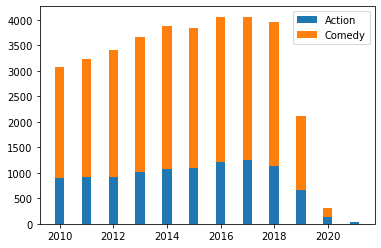

In [46]:
fig, ax = plt.subplots()
width = .35
ax.bar((action_year), action_count, width, label = "Action")
ax.bar((action_year), comedy_count, width, bottom = action_count, label = "Comedy")
ax.legend()